In [1]:
# import libarary for Problem define
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

## load data

In [12]:
df = pd.read_csv('datasets.csv')
df_name = df.columns
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


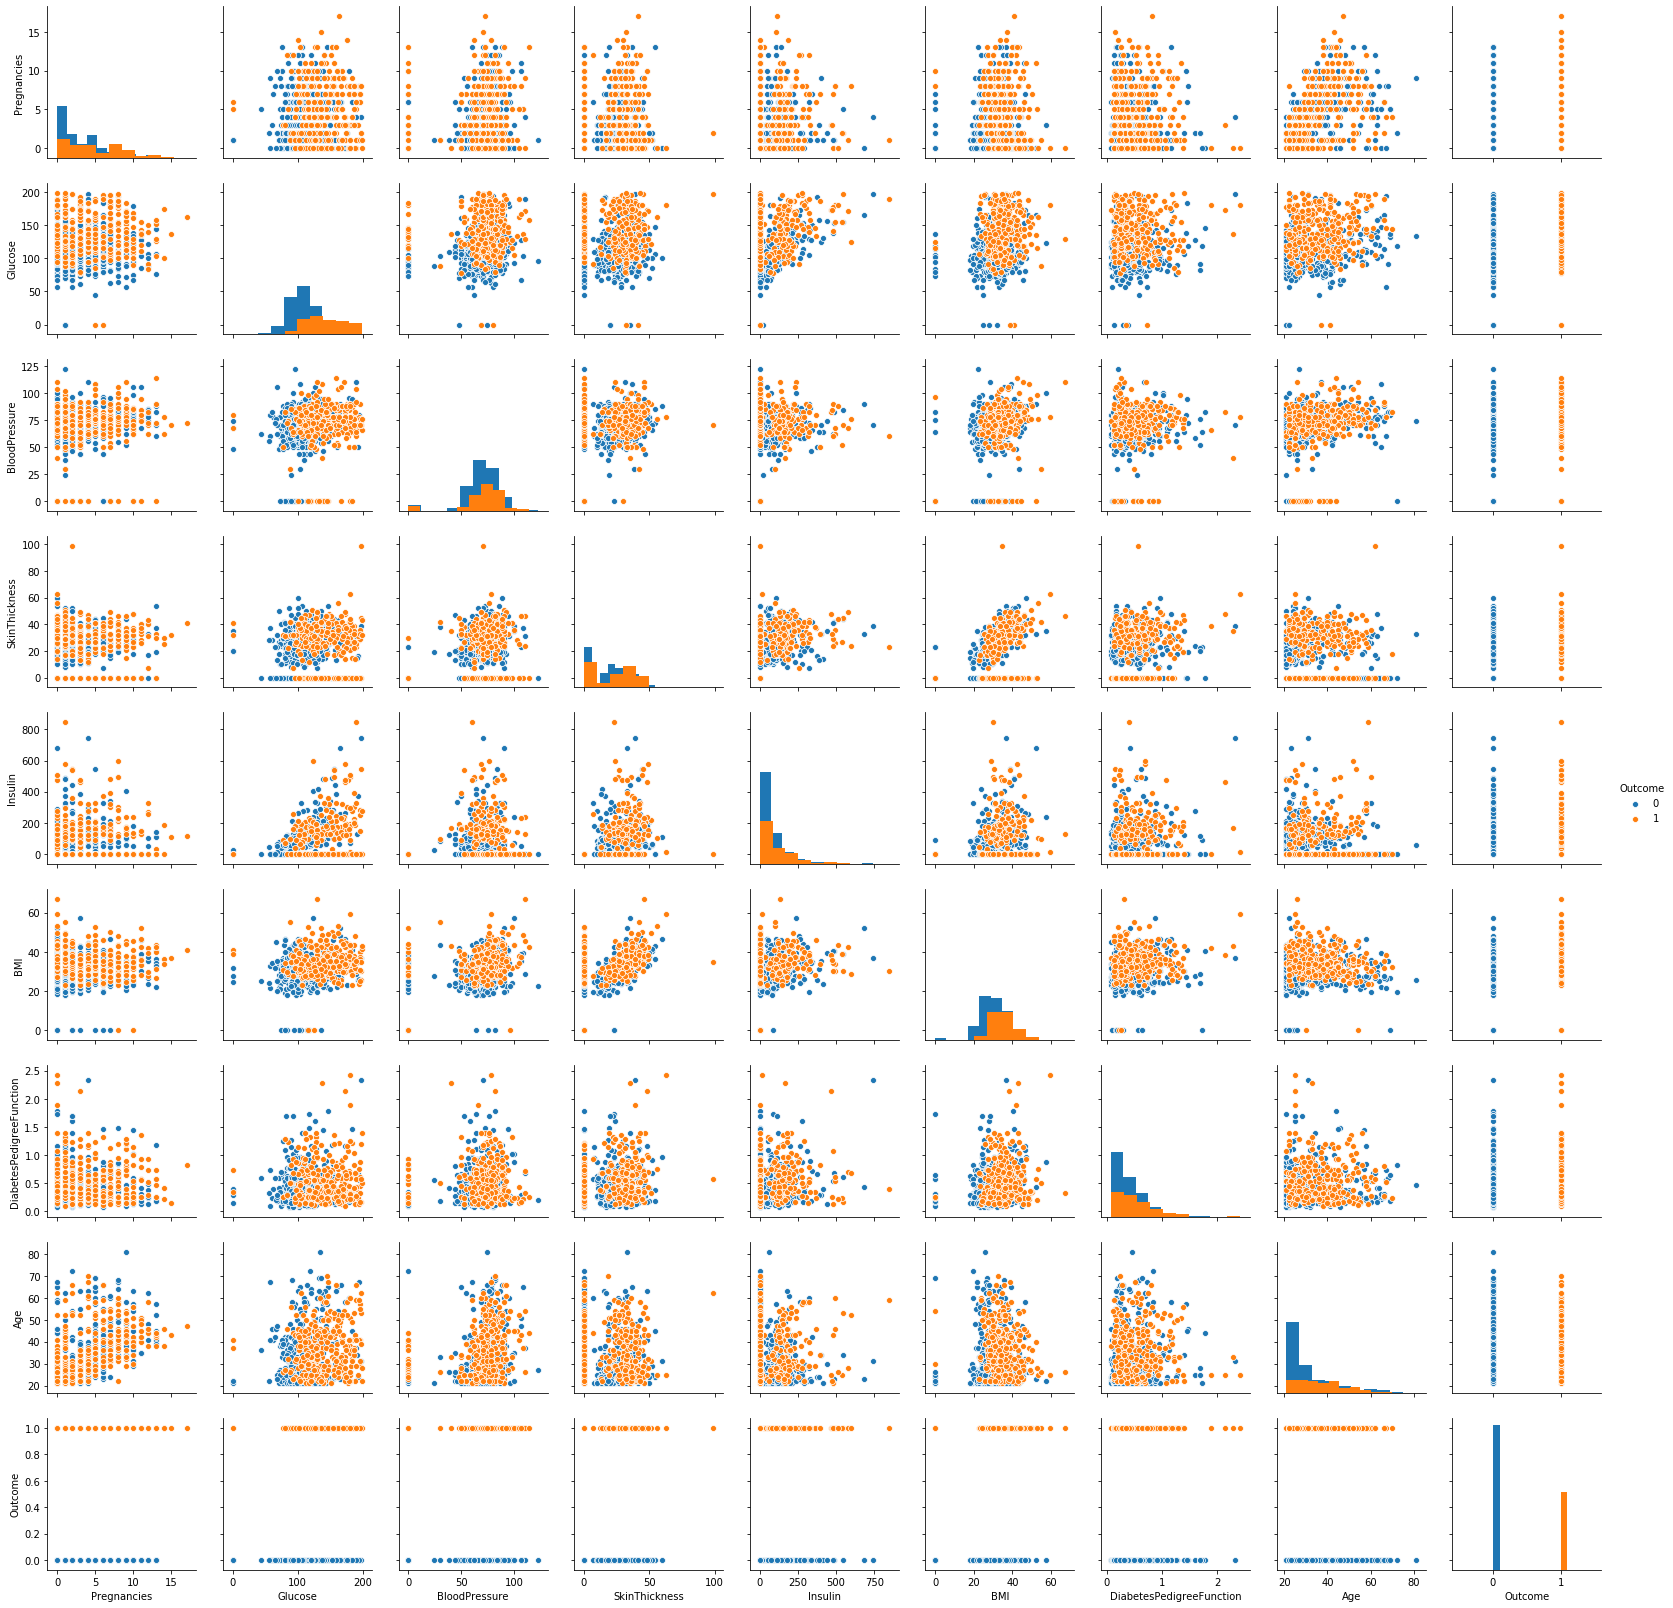

In [6]:
 g = sns.pairplot(df, hue="Outcome", diag_kind='hist')

In [7]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

In [8]:
def plotHist(df,nameOfFeature):
    cls_train = df[nameOfFeature]
    data_array = cls_train
    hist_data = np.histogram(data_array)
    binsize = .5

    trace1 = go.Histogram(
        x=data_array,
        histnorm='',
        name='Histogram of Wind Speed',
        autobinx=False,
        xbins=dict(
            start=df[nameOfFeature].min()-1,
            end=df[nameOfFeature].max()+1,
            size=binsize
        )
    )

    trace_data = [trace1]
    layout = go.Layout(
        bargroupgap=0.3,
         title='The distribution of ' + nameOfFeature,
        xaxis=dict(
            title=nameOfFeature,
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title='Number of labels',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
    fig = go.Figure(data=trace_data, layout=layout)
    py.iplot(fig)

In [9]:
plotHist(df, 'Pregnancies')

In [10]:
from scipy.stats import skew
from scipy.stats import kurtosis
def plotBarCat(df,feature,target):
    x0 = df[df[target]==0][feature]
    x1 = df[df[target]==1][feature]

    trace1 = go.Histogram(
        x=x0,
        opacity=0.75
    )
    trace2 = go.Histogram(
        x=x1,
        opacity=0.75
    )

    data = [trace1, trace2]
    layout = go.Layout(barmode='overlay',
                      title=feature,
                       yaxis=dict(title='Count'
        ))
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='overlaid histogram')
    
    def DescribeFloatSkewKurt(df,target):
        print('-*-'*25)
        print("{0} mean : ".format(target), np.mean(df[target]))
        print("{0} var  : ".format(target), np.var(df[target]))
        print("{0} skew : ".format(target), skew(df[target]))
        print("{0} kurt : ".format(target), kurtosis(df[target]))
        print('-*-'*25)
    
    DescribeFloatSkewKurt(df,target)

In [13]:
plotBarCat(df,df_name[0],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


## Outliers investigation

In [20]:
def OutLiersBox(df,nameOfFeature):
    
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

    trace2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

    trace3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig, filename = "Outliers")
    

In [22]:
OutLiersBox(df, df_name[0])